In [8]:
import numpy as np
import matplotlib.pyplot as plt

import os

from gendata_2dt import *
from encoding_matrix import gen_encoding
from womm_phantom import gen_phantom_parts
from c_velsolve import *

%matplotlib inline

### Generate Encoding Matrix

In [4]:
venc = 50
A0 = gen_encoding('6pt-Zwart', True)
A = A0 * np.pi / venc

print(A)

[[ 0.          0.          0.        ]
 [ 0.          0.03303266  0.05344797]
 [ 0.03303266  0.05344797  0.        ]
 [ 0.05344797  0.          0.03303266]
 [ 0.         -0.03303266  0.05344797]
 [-0.03303266  0.05344797  0.        ]
 [-0.05344797  0.          0.03303266]]


### Simulate velocities
The noiseless simulation is saved on disk so repeat experiments go faster

(-0.5, 33.5, 95.5, -0.5)

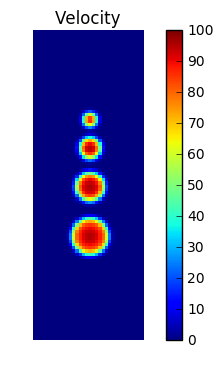

In [27]:
sim_res = 0.2 # Resolution (mm) of high res phantom

fname = 'icosa6_venc%.0f_sres%.2f.npz' % (venc, sim_res)

if not os.path.isfile(fname):
    
    sim_res, v3, k_v3, k_mask, k_data = precompute_2dt(A, oversamp = 2, s_res = sim_res*2, diam=(5,7.5,10,12.5), signal = (.8, 1.0))
    np.savez_compressed(fname, sim_res = sim_res, v3 = v3, k_v3 = k_v3, k_mask = k_mask, k_data=k_data)

# Display Velocity
plt.figure()
plt.imshow(v3ss[2,5], clim=(0,100), interpolation='nearest')
plt.colorbar()
plt.gca().set_title('Velocity')
plt.axis('off')

### Simulate acquisition data
High resolution simulated dat is subsampled, noise is added, and converted to complex data based on the encoding matrix

v3ss is the noiseless reference velocity at a matched resolution, mask_ss is an aray of vessel masks, data_ss is the simulated data

(-0.5, 33.5, 95.5, -0.5)

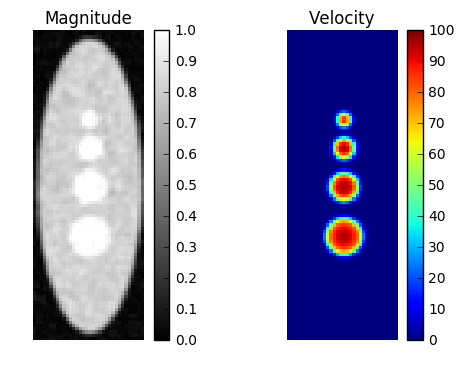

In [28]:
SNR = 30
res = 1.0

v3ss, mask_ss, data_ss = subsample_precomputed_2dt(fname, s_res = res, SNR = SNR)


# Display Magnitude and Velocity
f, (ax1, ax2) = plt.subplots(1, 2)

im = ax1.imshow(np.abs(data_ss[0,5]), cmap='gray', clim=(0,1), interpolation='nearest')
f.colorbar(im, ax=ax1)
ax1.set_title('Magnitude')
ax1.axis('off')

im = ax2.imshow(v3ss[2,5], clim=(0,100), interpolation='nearest')
f.colorbar(im, ax=ax2)
ax2.set_title('Velocity')
ax2.axis('off')

In [ ]:
f.axes